# Imports

In [82]:
import seaborn as sns
import numpy as np
import os
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
from typing import *
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide the code."></form>''')

# Table preparation:
Analyse of the table contaning all mapping statistics (*Log.final.out*) generated by the tool STAR. 
Unnecessary columns are deleted.

In [153]:
df = pd.read_table("../reports/mapping_stat.tsv")
columns = df.columns.to_list()
df = df.drop(labels=['Started job on', 'Started mapping on', 'Finished on', 
                     'Mapping speed, Million of reads per hour',
                     'Average input read length',
                     'Deletion rate per base', 'Insertion rate per base',
                     'Deletion average length', 'Insertion average length',
                     'Mismatch rate per base, %'], axis=1)

display(df)

,sample,sample_unit,read,Number of input reads,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,...,Number of splices: Non-canonical,Number of reads mapped to multiple loci,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads
0,cow-testis-neonat1,SRR7175531,R1,48857764,39854763,81.57,148.39,11175040,10561686,11049666,...,40255,7308614,14.96,20752,0.04,0.0,3.37,0.06,499903,1.02
1,cow-testis-neonat1,SRR7175531,R2,48857764,38125225,78.03,147.66,11656297,10973015,11528674,...,30064,7878972,16.13,18750,0.04,0.0,5.75,0.05,402728,0.82
2,cow-testis-neonat2,SRR7175526,R1,48330765,39099361,80.90,148.55,11315163,10751738,11196248,...,31888,7730995,16.00,14626,0.03,0.0,3.03,0.04,430184,0.89
3,cow-testis-neonat2,SRR7175526,R2,48330765,37367345,77.32,147.83,11924908,11276073,11794696,...,27461,8410108,17.40,13292,0.03,0.0,5.21,0.04,347540,0.72
4,cow-testis-neonat3,SRR7175527,R1,57816503,49445304,85.52,148.53,12647914,11978561,12495890,...,51933,6511989,11.26,30437,0.05,0.0,3.09,0.08,546774,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,cow-liver-K024,K024_S19_L002,R2,22287057,20082538,90.11,97.80,5534564,5401415,5487116,...,12955,1822651,8.18,6197,0.03,0.0,1.58,0.10,66501,0.30
84,cow-liver-K024,K024_S19_L006,R1,22214904,20183350,90.85,97.91,5285283,5175934,5240977,...,12839,1795444,8.08,6438,0.03,0.0,0.93,0.10,68241,0.31
85,cow-liver-K024,K024_S19_L006,R2,22214904,20024973,90.14,97.80,5523786,5390910,5476860,...,12788,1818301,8.19,6223,0.03,0.0,1.54,0.10,65514,0.29
86,cow-liver-K024,K024_S41_L004,R1,25385190,23072081,90.89,97.90,6031658,5906018,5980921,...,14878,2038178,8.03,7406,0.03,0.0,0.95,0.10,77965,0.31


# Merging samples:
Merging the data on a per sample basis (merging technical replicates).

In [154]:
aggregation_functions = defaultdict()
for column in df.columns:
    if column == "sample":
        aggregation_functions[column] = 'first'
        continue
    if column == "read":
        aggregation_functions[column] = 'first'
        continue
    if "%" in column or 'Average' in column:
        aggregation_functions[column] = 'mean'
        continue
    if "number" in column.lower():
        aggregation_functions[column] = 'sum'
df_new = df.groupby(['sample','read']).aggregate(aggregation_functions)

# Create new column with the concatenation of sample and read names:
sample = df_new["sample"].to_list() 
read = df_new["read"].to_list()
sample_read = [i + "-" + j for i, j in zip(sample, read)] 
df_new["sample-read"] = sample_read

display(df_new)

sample read  Number of input reads  \
sample             read                                                   
cow-liver-B004     R1        cow-liver-B004   R1               68088155   
                   R2        cow-liver-B004   R2               68088155   
cow-liver-B005     R1        cow-liver-B005   R1               59261965   
                   R2        cow-liver-B005   R2               59261965   
cow-liver-B008     R1        cow-liver-B008   R1               67721906   
                   R2        cow-liver-B008   R2               67721906   
cow-liver-B022     R1        cow-liver-B022   R1               65895110   
                   R2        cow-liver-B022   R2               65895110   
cow-liver-B027     R1        cow-liver-B027   R1               71417085   
                   R2        cow-liver-B027   R2               71417085   
cow-liver-B028     R1        cow-liver-B028   R1               74118427   
                   R2        cow-liver-B028   R2               74118427   
cow-liver-K001     R1        cow-liver-K001   R1               61179358   
                   R2        cow-liver-K001   R2               61179358   
cow-liver-K006     R1        cow-liver-K006   R1               61785728   
                   R2        cow-liver-K006   R2               61785728   
cow-liver-K011     R1        cow-liver-K011   R1               61734135   
                   R2        cow-liver-K011   R2               61734135   
cow-liver-K013     R1        cow-liver-K013   R1               72722710   
                   R2        cow-liver-K013   R2               72722710   
cow-liver-K018     R1        cow-liver-K018   R1               70188534   
                   R2        cow-liver-K018   R2               70188534   
cow-liver-K024     R1        cow-liver-K024   R1               69887151   
                   R2        cow-liver-K024   R2               69887151   
cow-testis-adult1  R1     cow-testis-adult1   R1               47433310   
                   R2     cow-testis-adult1   R2               47433310   
cow-testis-adult2  R1     cow-testis-adult2   R1               49677655   
                   R2     cow-testis-adult2   R2               49677655   
cow-testis-adult3  R1     cow-testis-adult3   R1               49338494   
                   R2     cow-testis-adult3   R2               49338494   
cow-testis-neonat1 R1    cow-testis-neonat1   R1               48857764   
                   R2    cow-testis-neonat1   R2               48857764   
cow-testis-neonat2 R1    cow-testis-neonat2   R1               48330765   
                   R2    cow-testis-neonat2   R2               48330765   
cow-testis-neonat3 R1    cow-testis-neonat3   R1               57816503   
                   R2    cow-testis-neonat3   R2               57816503   
pig-liver-old1     R1        pig-liver-old1   R1               39595686   
                   R2        pig-liver-old1   R2               39595686   
pig-liver-old2     R1        pig-liver-old2   R1               38500651   
                   R2        pig-liver-old2   R2               38500651   
pig-liver-young-1  R1     pig-liver-young-1   R1               32939263   
                   R2     pig-liver-young-1   R2               32939263   
pig-liver-young-2  R1     pig-liver-young-2   R1               32287173   
                   R2     pig-liver-young-2   R2               32287173   
pig-testis-31      R1         pig-testis-31   R1               73041056   
                   R2         pig-testis-31   R2               73041056   
pig-testis-5       R1          pig-testis-5   R1               89197627   
                   R2          pig-testis-5   R2               89197627   
pig-testis-54      R1         pig-testis-54   R1               86597430   
                   R2         pig-testis-54   R2               86597430   

                         Uniquely mapped reads number  \
sample             read                                 
cow-liver-B004     R1 

# I. Number of reads per individual:
Table containing the number of reads per individuals.

sample read  \
sample             read                            
cow-liver-B004     R1        cow-liver-B004   R1   
                   R2        cow-liver-B004   R2   
cow-liver-B005     R1        cow-liver-B005   R1   
                   R2        cow-liver-B005   R2   
cow-liver-B008     R1        cow-liver-B008   R1   
                   R2        cow-liver-B008   R2   
cow-liver-B022     R1        cow-liver-B022   R1   
                   R2        cow-liver-B022   R2   
cow-liver-B027     R1        cow-liver-B027   R1   
                   R2        cow-liver-B027   R2   
cow-liver-B028     R1        cow-liver-B028   R1   
                   R2        cow-liver-B028   R2   
cow-liver-K001     R1        cow-liver-K001   R1   
                   R2        cow-liver-K001   R2   
cow-liver-K006     R1        cow-liver-K006   R1   
                   R2        cow-liver-K006   R2   
cow-liver-K011     R1        cow-liver-K011   R1   
                   R2        cow-liver-K011   R2   
cow-liver-K013     R1        cow-liver-K013   R1   
                   R2        cow-liver-K013   R2   
cow-liver-K018     R1        cow-liver-K018   R1   
                   R2        cow-liver-K018   R2   
cow-liver-K024     R1        cow-liver-K024   R1   
                   R2        cow-liver-K024   R2   
cow-testis-adult1  R1     cow-testis-adult1   R1   
                   R2     cow-testis-adult1   R2   
cow-testis-adult2  R1     cow-testis-adult2   R1   
                   R2     cow-testis-adult2   R2   
cow-testis-adult3  R1     cow-testis-adult3   R1   
                   R2     cow-testis-adult3   R2   
cow-testis-neonat1 R1    cow-testis-neonat1   R1   
                   R2    cow-testis-neonat1   R2   
cow-testis-neonat2 R1    cow-testis-neonat2   R1   
                   R2    cow-testis-neonat2   R2   
cow-testis-neonat3 R1    cow-testis-neonat3   R1   
                   R2    cow-testis-neonat3   R2   
pig-liver-old1     R1        pig-liver-old1   R1   
                   R2        pig-liver-old1   R2   
pig-liver-old2     R1        pig-liver-old2   R1   
                   R2        pig-liver-old2   R2   
pig-liver-young-1  R1     pig-liver-young-1   R1   
                   R2     pig-liver-young-1   R2   
pig-liver-young-2  R1     pig-liver-young-2   R1   
                   R2     pig-liver-young-2   R2   
pig-testis-31      R1         pig-testis-31   R1   
                   R2         pig-testis-31   R2   
pig-testis-5       R1          pig-testis-5   R1   
                   R2          pig-testis-5   R2   
pig-testis-54      R1         pig-testis-54   R1   
                   R2         pig-testis-54   R2   

                         Uniquely mapped reads number  \
sample             read                                 
cow-liver-B004     R1                        62716875   
                   R2                        62224258   
cow-liver-B005     R1                        54402399   
                   R2                        53863244   
cow-liver-B008     R1                        62567917   
                   R2                        61851992   
cow-liver-B022     R1                        59017608   
                   R2                        58572888   
cow-liver-B027     R1                        63516553   
                   R2                        60393323   
cow-liver-B028     R1                        67268640   
                   R2                        66504581   
cow-liver-K001     R1                        57167389   
                   R2                        56723713   
cow-liver-K006     R1                        56914380   
                   R2                        56296030   
cow-liver-K011     R1                        57128248   
                   R2                        56349624   
cow-liver-K013     R1                        66432595   
                   R2                        65284815   
cow-liver-K018     R1                        64395759   
                   R2

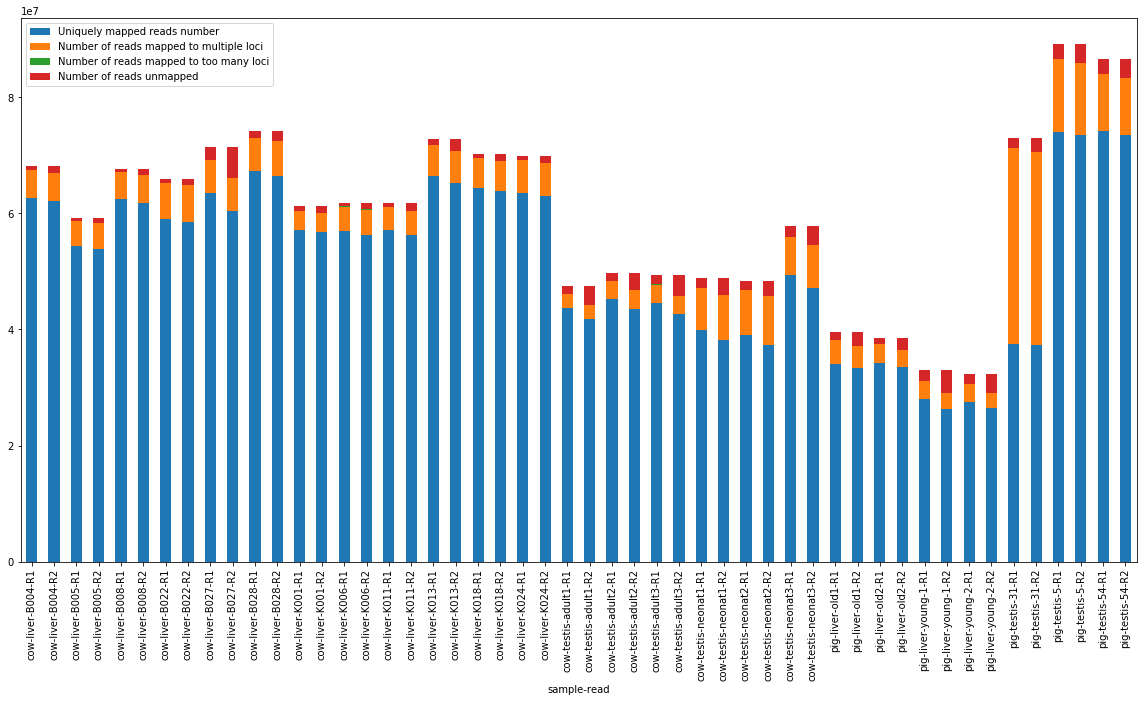

In [155]:
df_nb_read = pd.DataFrame(df_new)

# Compute the number of unmapped reads:
df_nb_read["Number of reads unmapped"] = (df_nb_read['Number of input reads'] - 
                                   (df_nb_read['Uniquely mapped reads number'] +  
                                   df_nb_read['Number of reads mapped to multiple loci']))  

# Create a new table with columns of interest:
columns_clean = ['sample', 'read', 'Uniquely mapped reads number', 
                 'Number of reads mapped to multiple loci', 'Number of reads mapped to too many loci',
                 'Number of reads unmapped', 'sample-read']
df_clean = pd.DataFrame(df_nb_read, columns=columns_clean)
display(df_clean)

# Stacked bar plot:
df_clean.plot.bar(x='sample-read', stacked=True, figsize=(20,10));

# II. Number of chimeric reads per individual:

,samples,R1,R2
0,cow-liver-B004,638475,197052
1,cow-liver-B005,159445,156317
2,cow-liver-B008,173941,164223
3,cow-liver-B022,578785,197361
4,cow-liver-B027,203238,203224
5,cow-liver-B028,247767,233077
6,cow-liver-K001,185568,142515
7,cow-liver-K006,160935,148422
8,cow-liver-K011,176970,150013
9,cow-liver-K013,182874,176018


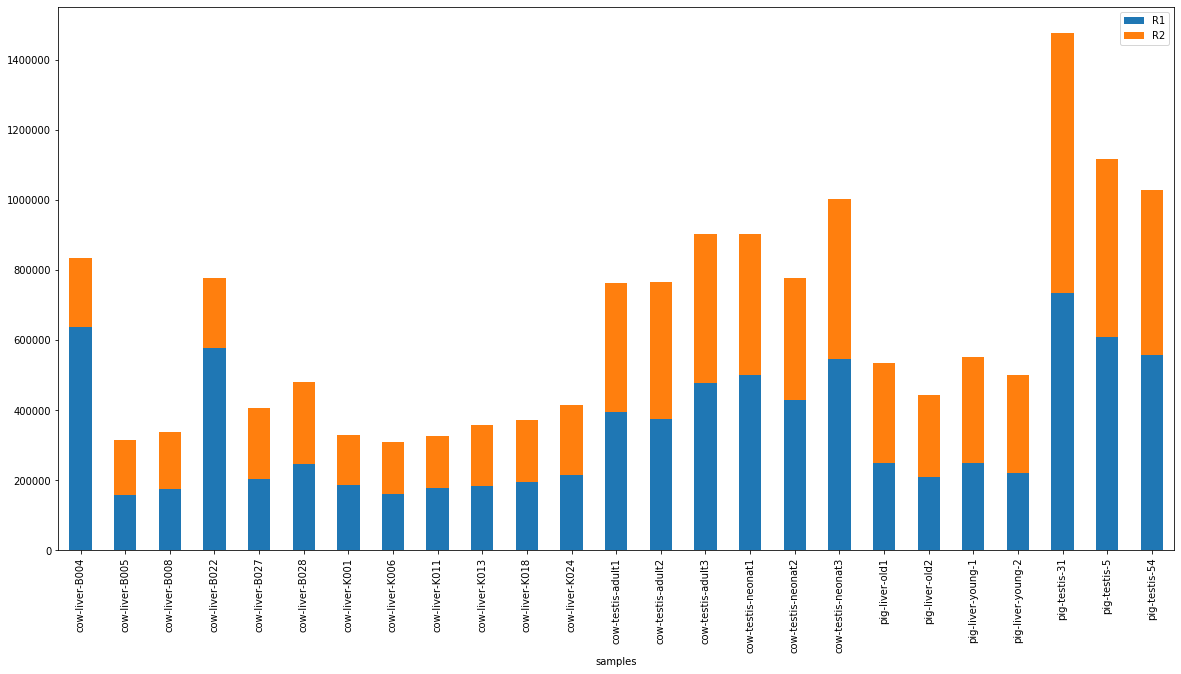

In [156]:
# Select the number of chimeric reads for R1 and R2 per individual:
columns_df2 = ['Number of chimeric reads']
df2 = pd.DataFrame(df_new, columns=columns_df2)
df2 = df2.unstack()

samples = df2.index.to_list()
nb_cr_R1 = df2["Number of chimeric reads", "R1"].to_list()
nb_cr_R2 = df2["Number of chimeric reads", "R2"].to_list()
data = {'samples': samples, 'R1': nb_cr_R1, 'R2': nb_cr_R2}

df2 = pd.DataFrame(data)
display(df2)

# Stacked bar plot:
df2.plot.bar(x='samples', stacked=True, figsize=(20,10));

# III. Number of annotated / non-annotated splices:

sample-read  \
sample             read                          
cow-liver-B004     R1        cow-liver-B004-R1   
                   R2        cow-liver-B004-R2   
cow-liver-B005     R1        cow-liver-B005-R1   
                   R2        cow-liver-B005-R2   
cow-liver-B008     R1        cow-liver-B008-R1   
                   R2        cow-liver-B008-R2   
cow-liver-B022     R1        cow-liver-B022-R1   
                   R2        cow-liver-B022-R2   
cow-liver-B027     R1        cow-liver-B027-R1   
                   R2        cow-liver-B027-R2   
cow-liver-B028     R1        cow-liver-B028-R1   
                   R2        cow-liver-B028-R2   
cow-liver-K001     R1        cow-liver-K001-R1   
                   R2        cow-liver-K001-R2   
cow-liver-K006     R1        cow-liver-K006-R1   
                   R2        cow-liver-K006-R2   
cow-liver-K011     R1        cow-liver-K011-R1   
                   R2        cow-liver-K011-R2   
cow-liver-K013     R1        cow-liver-K013-R1   
                   R2        cow-liver-K013-R2   
cow-liver-K018     R1        cow-liver-K018-R1   
                   R2        cow-liver-K018-R2   
cow-liver-K024     R1        cow-liver-K024-R1   
                   R2        cow-liver-K024-R2   
cow-testis-adult1  R1     cow-testis-adult1-R1   
                   R2     cow-testis-adult1-R2   
cow-testis-adult2  R1     cow-testis-adult2-R1   
                   R2     cow-testis-adult2-R2   
cow-testis-adult3  R1     cow-testis-adult3-R1   
                   R2     cow-testis-adult3-R2   
cow-testis-neonat1 R1    cow-testis-neonat1-R1   
                   R2    cow-testis-neonat1-R2   
cow-testis-neonat2 R1    cow-testis-neonat2-R1   
                   R2    cow-testis-neonat2-R2   
cow-testis-neonat3 R1    cow-testis-neonat3-R1   
                   R2    cow-testis-neonat3-R2   
pig-liver-old1     R1        pig-liver-old1-R1   
                   R2        pig-liver-old1-R2   
pig-liver-old2     R1        pig-liver-old2-R1   
                   R2        pig-liver-old2-R2   
pig-liver-young-1  R1     pig-liver-young-1-R1   
                   R2     pig-liver-young-1-R2   
pig-liver-young-2  R1     pig-liver-young-2-R1   
                   R2     pig-liver-young-2-R2   
pig-testis-31      R1         pig-testis-31-R1   
                   R2         pig-testis-31-R2   
pig-testis-5       R1          pig-testis-5-R1   
                   R2          pig-testis-5-R2   
pig-testis-54      R1         pig-testis-54-R1   
                   R2         pig-testis-54-R2   

                         Number of splices: Annotated (sjdb)  \
sample             read                                        
cow-liver-B004     R1                               16759289   
                   R2                               17258575   
cow-liver-B005     R1                               13842443   
                   R2                               14327500   
cow-liver-B008     R1                               16257039   
                   R2                               16804637   
cow-liver-B022     R1                               16165839   
                   R2                               16769060   
cow-liver-B027     R1                               17163616   
                   R2                               16976216   
cow-liver-B028     R1                               17239981   
                   R2                               17813358   
cow-liver-K001     R1                               14682613   
                   R2                               15196736   
cow-liver-K006     R1                               15857808   
                   R2                               16339958   
cow-liver-K011     R1                               15336037   
                   R2                               15896790   
cow-liver-K013     R1                               17821710   
                   R2                               18225569   
cow-liver-K018     R1     

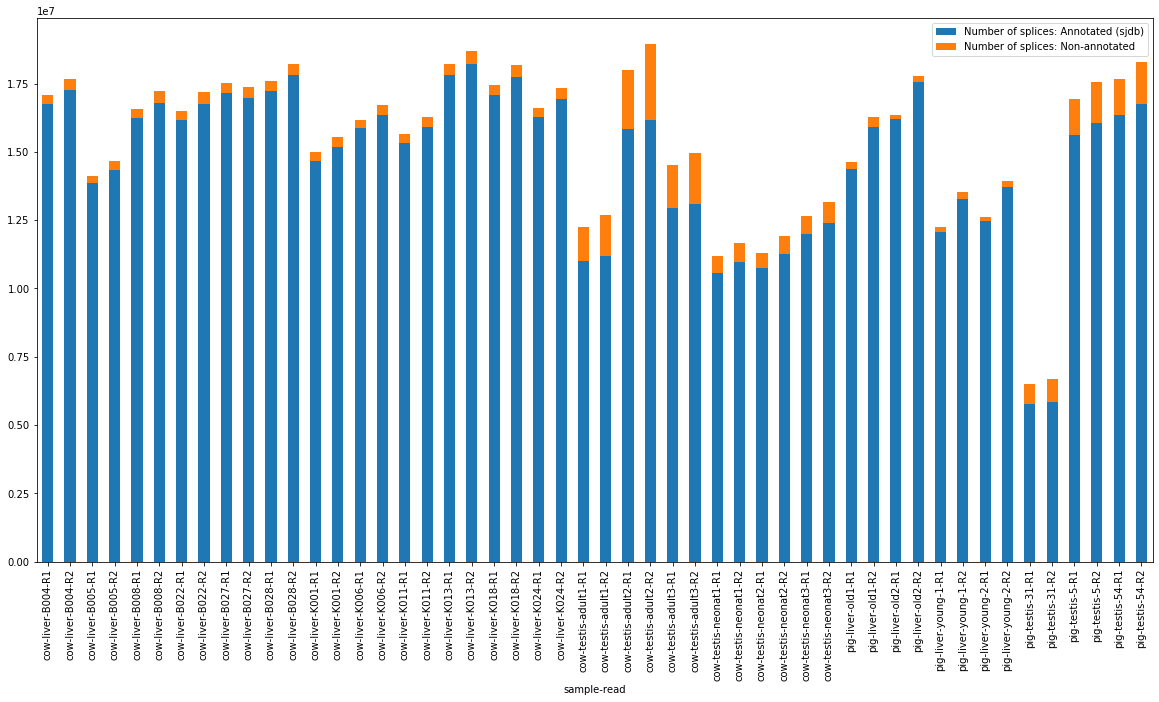

In [157]:
# Select the the number of annotated and non-annotated splices for R1/R2 per individual:
columns_df3 = ['sample', 'read', 'sample-read', 'Number of splices: Total', 
               'Number of splices: Annotated (sjdb)', 'Number of splices: GT/AG', 'Number of splices: GC/AG', 
               'Number of splices: AT/AC', 'Number of splices: Non-canonical']
df3 = pd.DataFrame(df_new, columns=columns_df3)

# Compute the number of non-annotated splices:
df3["Number of splices: Non-annotated"] = df3["Number of splices: Total"] - df3["Number of splices: Annotated (sjdb)"]

columns_df4 = ['sample-read', 'Number of splices: Annotated (sjdb)', 'Number of splices: Non-annotated']
df4 = pd.DataFrame(df3, columns=columns_df4)
display(df4)

# Stacked bar plot:
df4.plot.bar(x='sample-read', stacked=True, figsize=(20,10));

sample read  Number of input reads  \
sample             read                                                   
cow-liver-B004     R1        cow-liver-B004   R1               68088155   
                   R2        cow-liver-B004   R2               68088155   
cow-liver-B005     R1        cow-liver-B005   R1               59261965   
                   R2        cow-liver-B005   R2               59261965   
cow-liver-B008     R1        cow-liver-B008   R1               67721906   
                   R2        cow-liver-B008   R2               67721906   
cow-liver-B022     R1        cow-liver-B022   R1               65895110   
                   R2        cow-liver-B022   R2               65895110   
cow-liver-B027     R1        cow-liver-B027   R1               71417085   
                   R2        cow-liver-B027   R2               71417085   
cow-liver-B028     R1        cow-liver-B028   R1               74118427   
                   R2        cow-liver-B028   R2               74118427   
cow-liver-K001     R1        cow-liver-K001   R1               61179358   
                   R2        cow-liver-K001   R2               61179358   
cow-liver-K006     R1        cow-liver-K006   R1               61785728   
                   R2        cow-liver-K006   R2               61785728   
cow-liver-K011     R1        cow-liver-K011   R1               61734135   
                   R2        cow-liver-K011   R2               61734135   
cow-liver-K013     R1        cow-liver-K013   R1               72722710   
                   R2        cow-liver-K013   R2               72722710   
cow-liver-K018     R1        cow-liver-K018   R1               70188534   
                   R2        cow-liver-K018   R2               70188534   
cow-liver-K024     R1        cow-liver-K024   R1               69887151   
                   R2        cow-liver-K024   R2               69887151   
cow-testis-adult1  R1     cow-testis-adult1   R1               47433310   
                   R2     cow-testis-adult1   R2               47433310   
cow-testis-adult2  R1     cow-testis-adult2   R1               49677655   
                   R2     cow-testis-adult2   R2               49677655   
cow-testis-adult3  R1     cow-testis-adult3   R1               49338494   
                   R2     cow-testis-adult3   R2               49338494   
cow-testis-neonat1 R1    cow-testis-neonat1   R1               48857764   
                   R2    cow-testis-neonat1   R2               48857764   
cow-testis-neonat2 R1    cow-testis-neonat2   R1               48330765   
                   R2    cow-testis-neonat2   R2               48330765   
cow-testis-neonat3 R1    cow-testis-neonat3   R1               57816503   
                   R2    cow-testis-neonat3   R2               57816503   
pig-liver-old1     R1        pig-liver-old1   R1               39595686   
                   R2        pig-liver-old1   R2               39595686   
pig-liver-old2     R1        pig-liver-old2   R1               38500651   
                   R2        pig-liver-old2   R2               38500651   
pig-liver-young-1  R1     pig-liver-young-1   R1               32939263   
                   R2     pig-liver-young-1   R2               32939263   
pig-liver-young-2  R1     pig-liver-young-2   R1               32287173   
                   R2     pig-liver-young-2   R2               32287173   
pig-testis-31      R1         pig-testis-31   R1               73041056   
                   R2         pig-testis-31   R2               73041056   
pig-testis-5       R1          pig-testis-5   R1               89197627   
                   R2          pig-testis-5   R2               89197627   
pig-testis-54      R1         pig-testis-54   R1               86597430   
                   R2         pig-testis-54   R2               86597430   

                         Uniquely mapped reads number  \
sample             read                                 
cow-liver-B004     R1 

,cow-liver-B004-R1,cow-liver-B004-R2,cow-liver-B005-R1,cow-liver-B005-R2,cow-liver-B008-R1,cow-liver-B008-R2,cow-liver-B022-R1,cow-liver-B022-R2,cow-liver-B027-R1,cow-liver-B027-R2,...,pig-liver-young-1-R1,pig-liver-young-1-R2,pig-liver-young-2-R1,pig-liver-young-2-R2,pig-testis-31-R1,pig-testis-31-R2,pig-testis-5-R1,pig-testis-5-R2,pig-testis-54-R1,pig-testis-54-R2
Annotated,98.059768,97.702682,98.014495,97.669731,98.002938,97.581919,97.998052,97.583324,98.030152,97.657627,...,98.738838,98.08758,98.931791,98.653204,88.335084,87.651281,92.13311,91.395902,92.427117,91.757588
Non-annotated,1.940232,2.297318,1.985505,2.330269,1.997062,2.418081,2.001948,2.416676,1.969848,2.342373,...,1.261162,1.91242,1.068209,1.346796,11.664916,12.348719,7.86689,8.604098,7.572883,8.242412


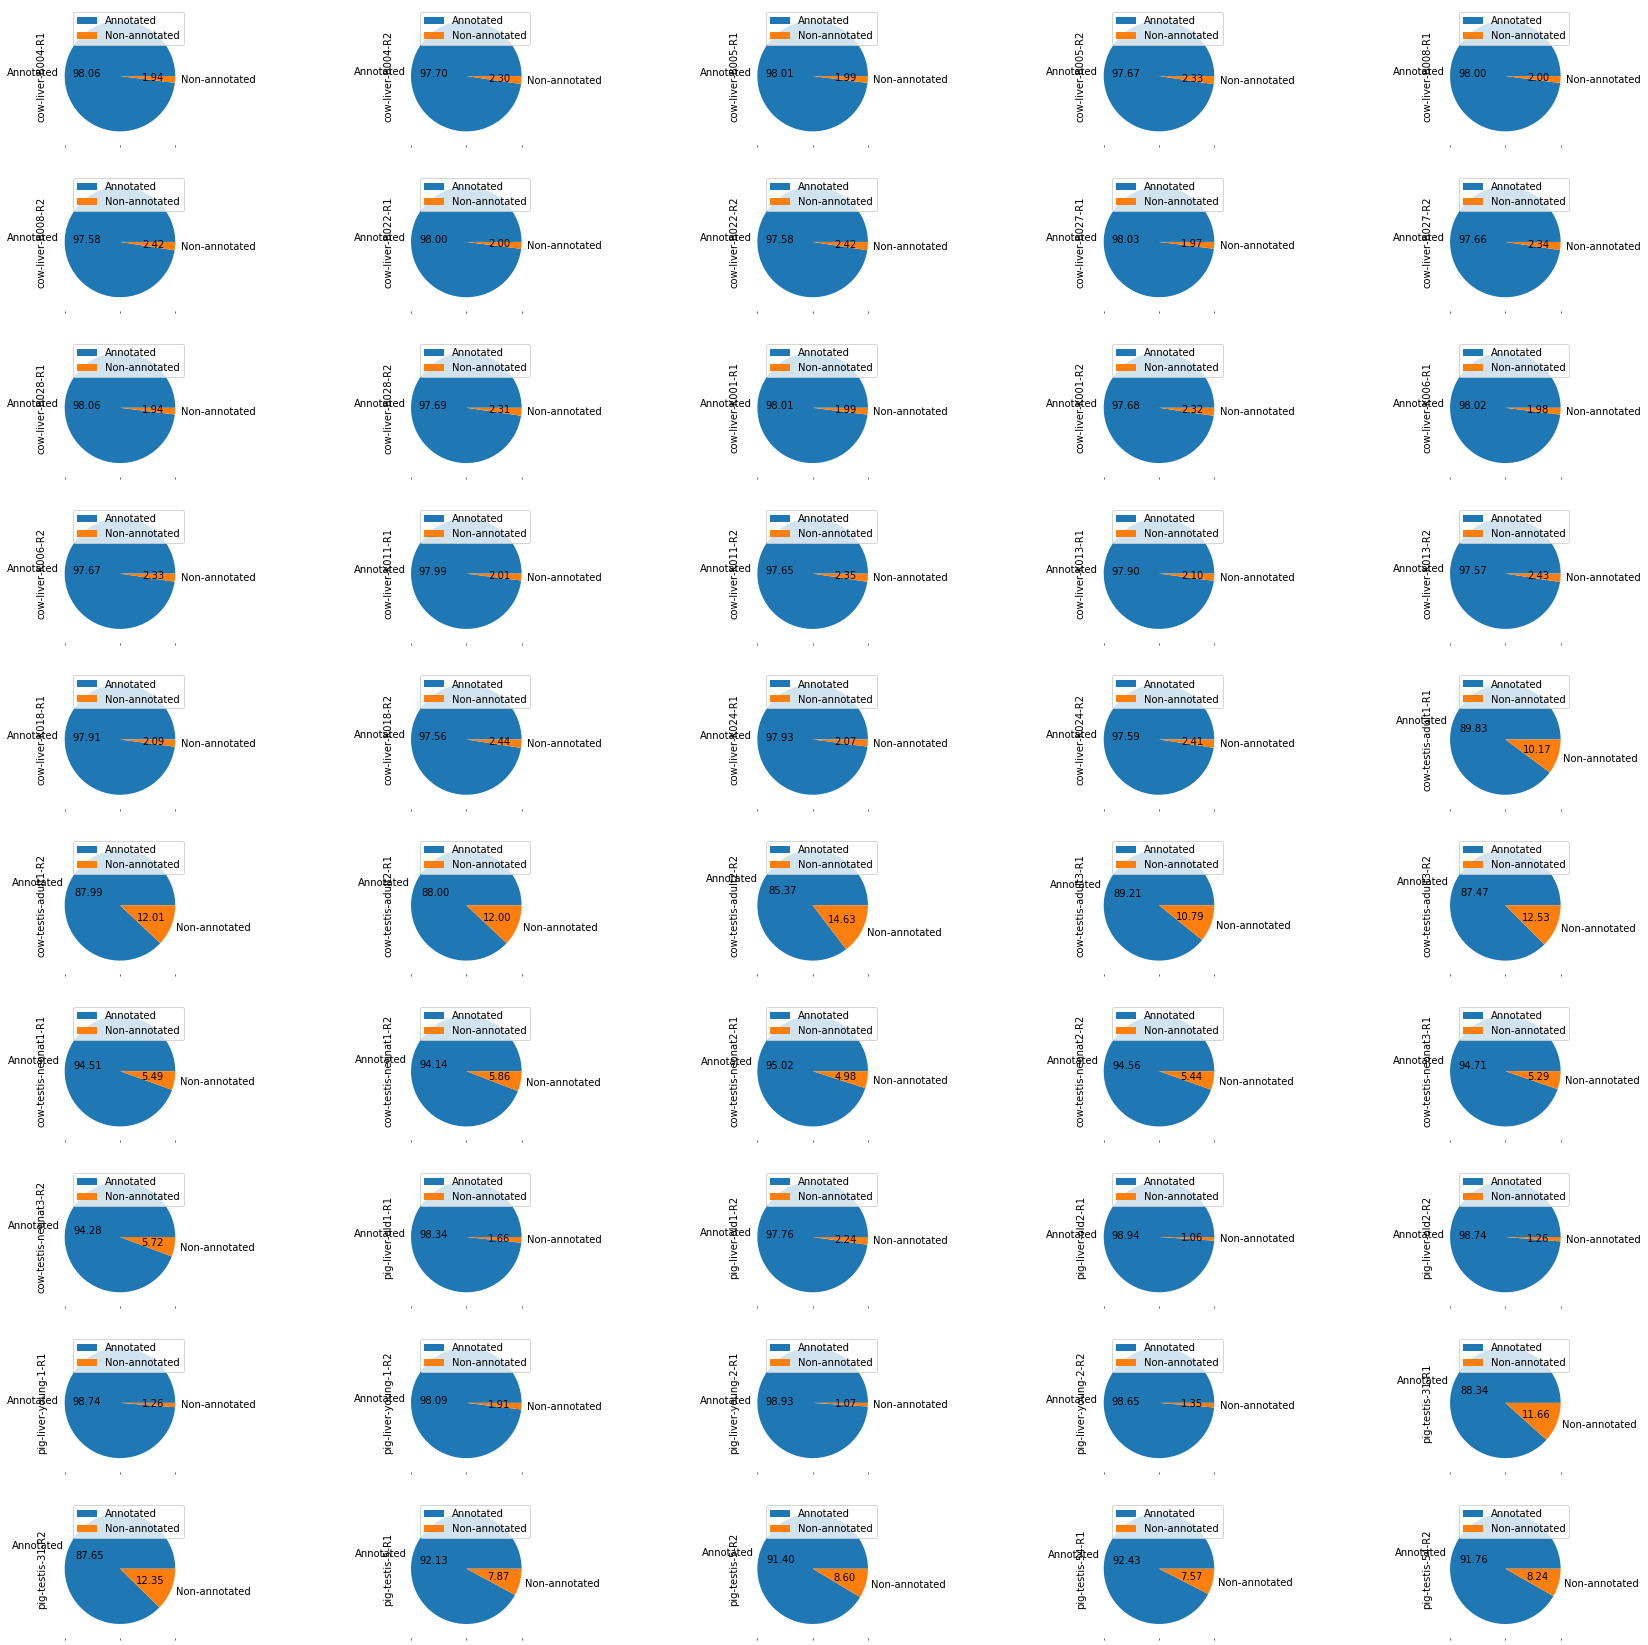

In [158]:
# Pie:  
display(df_new)

df_new["Number of splices: Non-annotated"] = df_new["Number of splices: Total"] - df_new["Number of splices: Annotated (sjdb)"]
df_new["% of splices: Annotated (sjdb)"] = ((df_new["Number of splices: Annotated (sjdb)"] * 100) / df_new["Number of splices: Total"])
df_new["% of splices: Non-annotated"] = ((df_new["Number of splices: Non-annotated"] * 100) / df_new["Number of splices: Total"])

d = df_new.set_index('sample-read')[['% of splices: Annotated (sjdb)','% of splices: Non-annotated']].T.to_dict('list')
df6 = pd.DataFrame(d, index=['Annotated', 'Non-annotated'])
display(df6)

plot = df6.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5)) 

# IV. Number of canonical and non-canonical splices:

sample read            sample-read  \
sample             read                                                   
cow-liver-B004     R1        cow-liver-B004   R1      cow-liver-B004-R1   
                   R2        cow-liver-B004   R2      cow-liver-B004-R2   
cow-liver-B005     R1        cow-liver-B005   R1      cow-liver-B005-R1   
                   R2        cow-liver-B005   R2      cow-liver-B005-R2   
cow-liver-B008     R1        cow-liver-B008   R1      cow-liver-B008-R1   
                   R2        cow-liver-B008   R2      cow-liver-B008-R2   
cow-liver-B022     R1        cow-liver-B022   R1      cow-liver-B022-R1   
                   R2        cow-liver-B022   R2      cow-liver-B022-R2   
cow-liver-B027     R1        cow-liver-B027   R1      cow-liver-B027-R1   
                   R2        cow-liver-B027   R2      cow-liver-B027-R2   
cow-liver-B028     R1        cow-liver-B028   R1      cow-liver-B028-R1   
                   R2        cow-liver-B028   R2      cow-liver-B028-R2   
cow-liver-K001     R1        cow-liver-K001   R1      cow-liver-K001-R1   
                   R2        cow-liver-K001   R2      cow-liver-K001-R2   
cow-liver-K006     R1        cow-liver-K006   R1      cow-liver-K006-R1   
                   R2        cow-liver-K006   R2      cow-liver-K006-R2   
cow-liver-K011     R1        cow-liver-K011   R1      cow-liver-K011-R1   
                   R2        cow-liver-K011   R2      cow-liver-K011-R2   
cow-liver-K013     R1        cow-liver-K013   R1      cow-liver-K013-R1   
                   R2        cow-liver-K013   R2      cow-liver-K013-R2   
cow-liver-K018     R1        cow-liver-K018   R1      cow-liver-K018-R1   
                   R2        cow-liver-K018   R2      cow-liver-K018-R2   
cow-liver-K024     R1        cow-liver-K024   R1      cow-liver-K024-R1   
                   R2        cow-liver-K024   R2      cow-liver-K024-R2   
cow-testis-adult1  R1     cow-testis-adult1   R1   cow-testis-adult1-R1   
                   R2     cow-testis-adult1   R2   cow-testis-adult1-R2   
cow-testis-adult2  R1     cow-testis-adult2   R1   cow-testis-adult2-R1   
                   R2     cow-testis-adult2   R2   cow-testis-adult2-R2   
cow-testis-adult3  R1     cow-testis-adult3   R1   cow-testis-adult3-R1   
                   R2     cow-testis-adult3   R2   cow-testis-adult3-R2   
cow-testis-neonat1 R1    cow-testis-neonat1   R1  cow-testis-neonat1-R1   
                   R2    cow-testis-neonat1   R2  cow-testis-neonat1-R2   
cow-testis-neonat2 R1    cow-testis-neonat2   R1  cow-testis-neonat2-R1   
                   R2    cow-testis-neonat2   R2  cow-testis-neonat2-R2   
cow-testis-neonat3 R1    cow-testis-neonat3   R1  cow-testis-neonat3-R1   
                   R2    cow-testis-neonat3   R2  cow-testis-neonat3-R2   
pig-liver-old1     R1        pig-liver-old1   R1      pig-liver-old1-R1   
                   R2        pig-liver-old1   R2      pig-liver-old1-R2   
pig-liver-old2     R1        pig-liver-old2   R1      pig-liver-old2-R1   
                   R2        pig-liver-old2   R2      pig-liver-old2-R2   
pig-liver-young-1  R1     pig-liver-young-1   R1   pig-liver-young-1-R1   
                   R2     pig-liver-young-1   R2   pig-liver-young-1-R2   
pig-liver-young-2  R1     pig-liver-young-2   R1   pig-liver-young-2-R1   
                   R2     pig-liver-young-2   R2   pig-liver-young-2-R2   
pig-testis-31      R1         pig-testis-31   R1       pig-testis-31-R1   
                   R2         pig-testis-31   R2       pig-testis-31-R2   
pig-testis-5       R1          pig-testis-5   R1        pig-testis-5-R1   
                   R2          pig-testis-5   R2        pig-testis-5-R2   
pig-testis-54      R1         pig-testis-54   R1       pig-testis-54-R1   
                   R2         pig-testis-54   R2       pig-testis-54-R2   

                         Number of splices: GT/AG  Number of splices: GC/AG  \
sample             read                                  

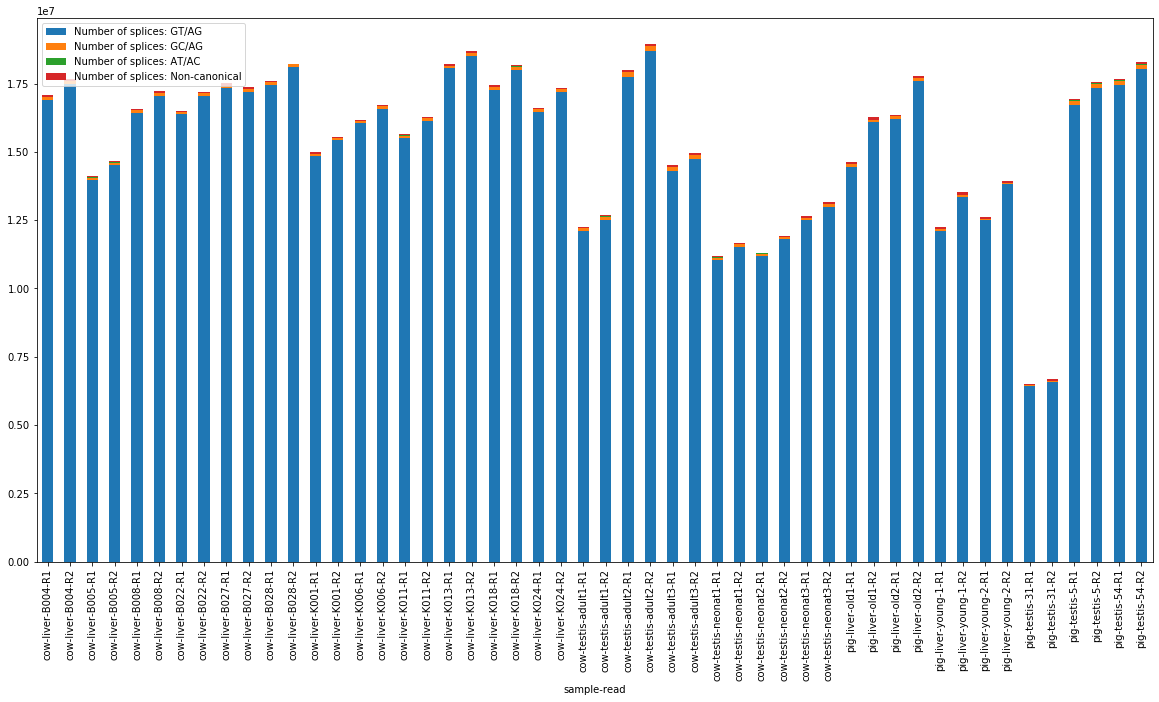

In [159]:
columns_df4 = ['sample', 'read', 'sample-read',  
               'Number of splices: GT/AG', 'Number of splices: GC/AG', 
               'Number of splices: AT/AC', 'Number of splices: Non-canonical']
df4 = pd.DataFrame(df3, columns=columns_df4)
display(df4)

# Stacked bar plot:
df4.plot.bar(x='sample-read', stacked=True, figsize=(20,10));

# V. Read size per individual:

,samples,R1,R2
0,cow-liver-B004,98.620000,98.580000
1,cow-liver-B005,97.840000,97.715000
2,cow-liver-B008,97.976667,97.836667
3,cow-liver-B022,98.640000,98.570000
4,cow-liver-B027,96.996667,96.786667
5,cow-liver-B028,97.143333,96.973333
6,cow-liver-K001,97.730000,97.560000
7,cow-liver-K006,97.690000,97.510000
8,cow-liver-K011,97.833333,97.626667
9,cow-liver-K013,97.783333,97.590000


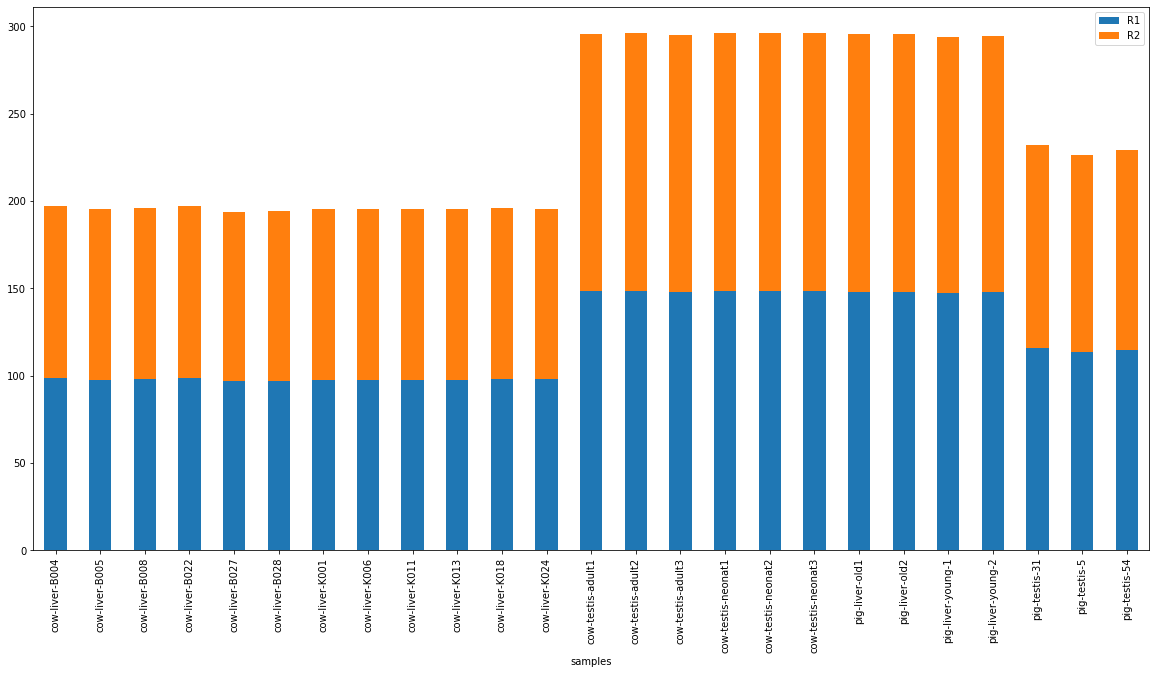

In [161]:
columns_df5 = ['sample', 'read', 'Average mapped length']
df5 = pd.DataFrame(df_new, columns=columns_df5)

samples = df2["samples"].to_list()
read_size_R1 = df_new["Average mapped length"][df_new["read"]=="R1"].to_list()
read_size_R2 = df_new["Average mapped length"][df_new["read"]=="R2"].to_list()
data = {'samples': samples, 'R1': read_size_R1, 'R2': read_size_R2}

df5 = pd.DataFrame(data)
display(df5)

# Stacked bar plot:
df5.plot.bar(x='samples', stacked=True, figsize=(20,10));